# ggplot 221 - Add straight lines

There are four kinds of straight line that are easy to add to a plot.
- horizontal lines with geom_hline (see 2a)
- vertical lines with geom_vline (see 2b)
- any straight line with geom_abline (see 2c)

# Add a trend line
- geom_abline can also add a linear regression trendline to a plot (see 3)

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - example : line plot price by carat

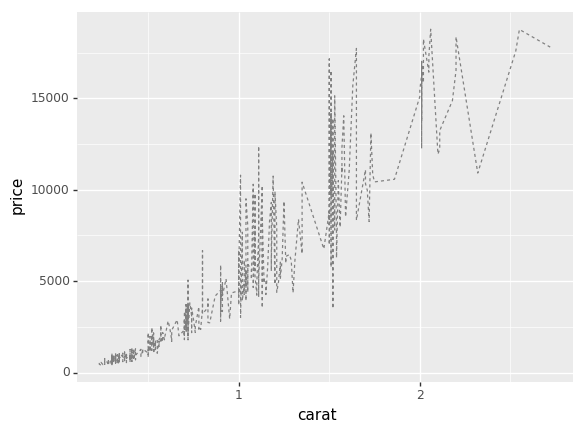

<ggplot: (-9223372036841392696)>

In [3]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_line(color='grey', linetype='dotted')

## 2a - geom_hline

We can add fixed horizontal lines to this plot with geom_vline

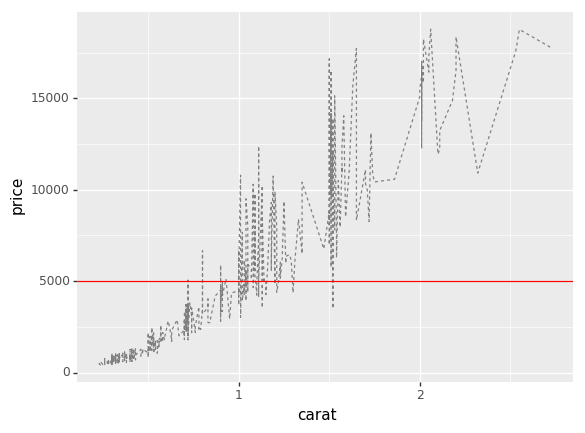

<ggplot: (13459930)>

In [4]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_line(color='grey', linetype='dotted') + \
        geom_hline(yintercept=[5000], color='red')

With the geom_hline we can draw more lines at once

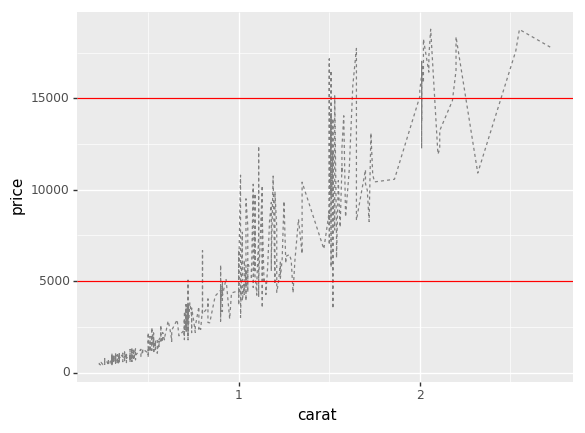

<ggplot: (13556144)>

In [5]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_line(color='grey', linetype='dotted') + \
        geom_hline(yintercept=[5000,15000], color='red')

geom_hline has aesthetics (see [documentation](http://ggplot.yhathq.com/docs/geom_hline.html))
- yintercept
- linetype
- color
- alpha
- size


## 2b - geom_vline

Adding vertical lines with geom_vline works the same (only use xintercept instead of yintercept).

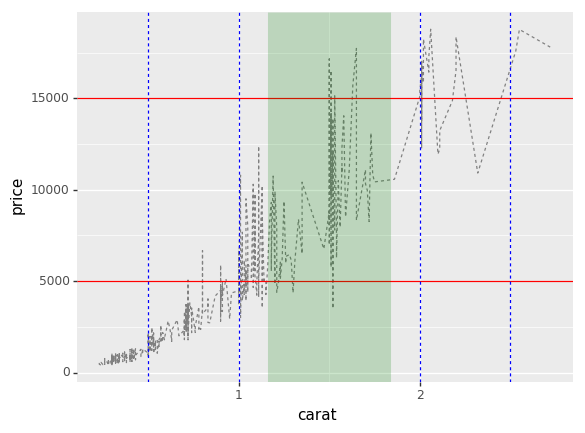

<ggplot: (13502966)>

In [6]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_line(color='grey', linetype='dotted') + \
        geom_hline(yintercept=[5000,15000], color='red') + \
        geom_vline(xintercept=[0.5,1,2,2.5], color='blue', linetype='dotted') + \
        geom_vline(xintercept=[1.5], color='green', size=50, alpha = 0.2)
        
        

Note that we can use the geom_vline to mark an area by making size large and the alpha low.  

geom_vline has aesthetics (see [documentation](http://ggplot.yhathq.com/docs/geom_vline.html))
- xintercept
- linetype
- color
- alpha
- size

## 2c - geom_abline

Adding a arbitrary straight line can be done with geom_abline 

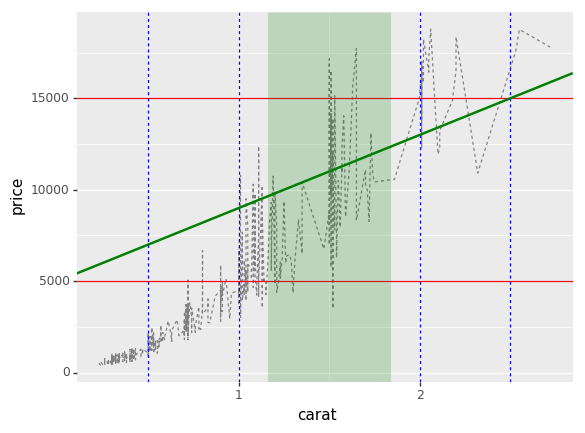

<ggplot: (13573938)>

In [7]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_line(color='grey', linetype='dotted') + \
        geom_hline(yintercept=[5000,15000], color='red') + \
        geom_vline(xintercept=[0.5,1,2,2.5], color='blue', linetype='dotted') + \
        geom_vline(xintercept=[1.5], color='green', size=50, alpha = 0.2) + \
        geom_abline(intercept=5000,slope=4000, colour="green",size=1)
 

The intercept is the intercept with th Y-axis.

geom_abline has aesthetics (see [documentation](http://ggplot.yhathq.com/docs/geom_abline.html))  
- intercept	...... y-axis intercept of line to be drawn
- slope	.......... slope of line to be drawn
- color........... (colour)	color of line to be drawn
- size ....... ... width of line to be drawn

# 3 - add a trendline

Abline often is used to draw a trendline through a scatterplot or a lineplot (see [linear regression](https://en.wikipedia.org/wiki/Linear_regression))  

Lets make a scatterplot showing price by carat

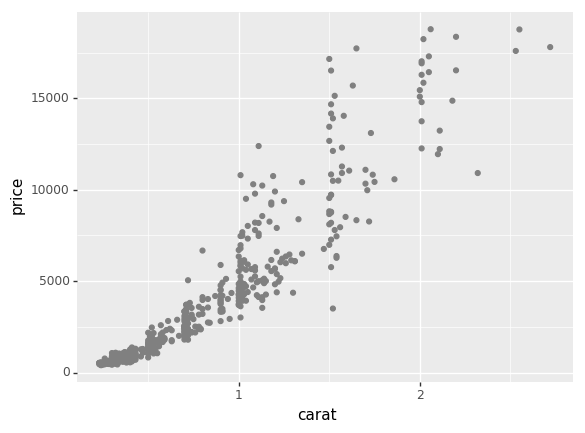

<ggplot: (-9223372036841287452)>

In [8]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_point(color='grey')


We could guess that all these points vary around a straight line through the points (0,0) and (2,15000).   
So the intercept is 0 and the slope is 15000/2 = 7500.  
We now can add an abline.

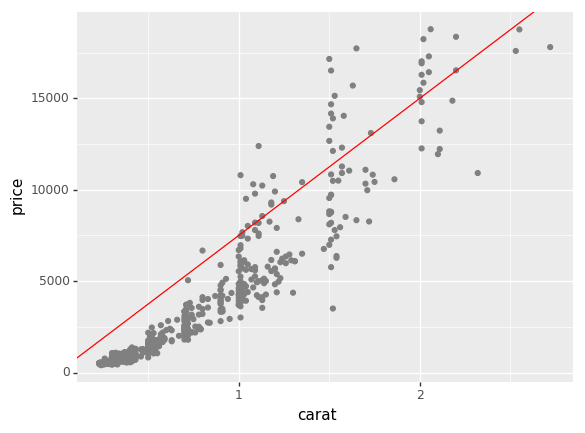

<ggplot: (-9223372036841219745)>

In [9]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_point(color='grey') + \
        geom_abline(intercept=0, slope=7500, color='red')

That is not quit right the intercept is to high, so we should make an other guess, etc.

With linear regression we can let the computer calculate the best possible values for the intercept and the slope.  
So we do not have to guess, we can let the computer do the work.   
One way to do that is:

In [11]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='price ~ carat', data=dia).fit()

# print the coefficients
(my_intercept, my_slope) = lm.params
print(my_intercept)
print(my_slope)

-2357.30029534
7913.54366103


Our intercept guess was way off, and our slope a little to low.  
Lets put the correct values in our abline.

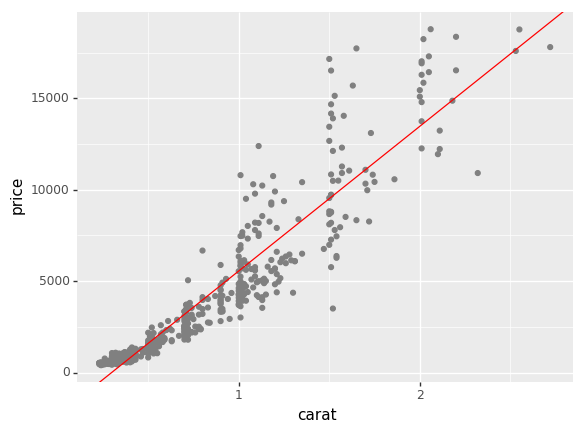

<ggplot: (-9223372036846864829)>

In [12]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_point(color='grey') + \
        geom_abline(intercept=my_intercept, slope=my_slope, color='red')

When we change the geom_point to geom_line we get

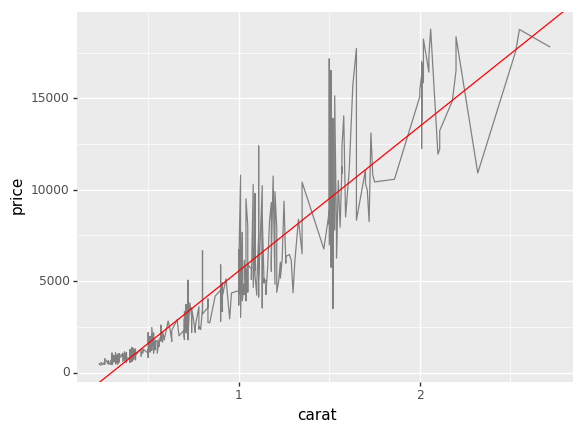

<ggplot: (13653007)>

In [13]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_line(color='grey') + \
        geom_abline(intercept=my_intercept, slope=my_slope, color='red')

Note how easy it is to switch form geom_point to geom_line.


## use stat_smooth() to add a regression line
It is possible to add a linear regression line by adding a stat_smooth() to the plot.   
The red line is the regression line, the blue erea around the line shows the certainty

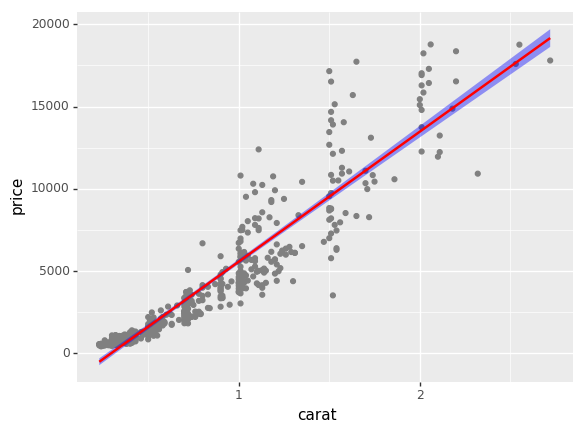

<ggplot: (13581667)>

In [14]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
        geom_point(color='grey') + \
        stat_smooth(method='lm', color='red', fill='blue')